viscosity info:


In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from ellipse import LsqEllipse
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from skimage import io
import matplotlib.pyplot as plt
import math
import pickle
import statistics
from statistics import mean
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks


from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pickle

In [6]:
import speckle
from speckle.inference.read_in_data import *
from speckle.inference.correlation_heatmap import *
from speckle.inference.calculating_tau import *
from speckle.inference.dedrift import *

In [64]:
def compute_g2t_wo_kernel(px,laglist_g2t):
    intensity=[]
    for t in range(0,img.shape[0],1):
        intensity.append(img[t][px[0],px[1]])
        
    g2t=[]
    for lag in laglist_g2t:
        numerator_sum=0
        denumerator_sum_1=0
        denumerator_sum_2=0
        max_t_range=7000
        for t in range(0,max_t_range,1):
            numerator_sum=numerator_sum+int(intensity[t])*int(intensity[t+lag])
            denumerator_sum_1=denumerator_sum_1+int(intensity[t])
            denumerator_sum_2=denumerator_sum_2+int(intensity[t+lag])
        numerator=numerator_sum/max_t_range
        denumerator_1=denumerator_sum_1/max_t_range
        denumerator_2=denumerator_sum_2/max_t_range
        g2t.append((numerator/denumerator_1/denumerator_2)-1)
    return g2t

# 0.05% 100 nm 40x_objective 1 au

In [20]:
video_time_length=60 #s
video_frame_numbers=8699 #frames
imgname='0p05percentwt_100nm_inglycerol_102umdepth_1min_1au_40xwobj'
foldername='/Volumes/wwyyrx/Wenyun/Speckle/20220712/analysis/'
framespeed=video_time_length/video_frame_numbers
NA=1.1

In [21]:
print(framespeed)

0.006897344522358892


In [22]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]

In [23]:
print(frame_number)

8699


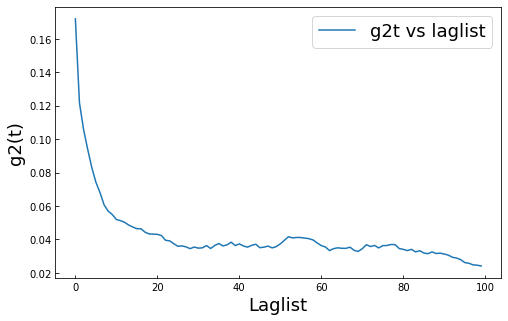

In [67]:
plt.figure(figsize=(8,5))
laglist_g2t=range(0,100,1)
g2t=compute_g2t_wo_kernel([25,10],laglist_g2t)
plt.plot(laglist_g2t,g2t)
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

In [7]:
laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(0,32,1):
    for x in range(30,50,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

In [8]:
average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [13]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

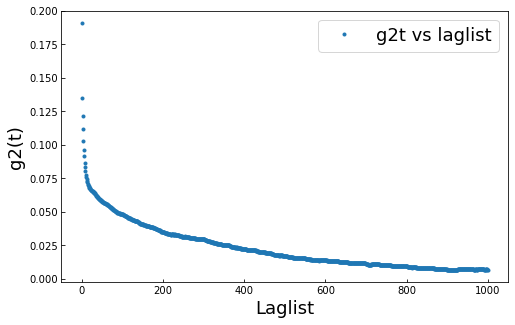

In [14]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

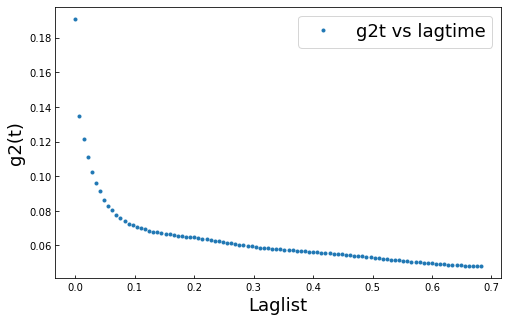

In [15]:
plt.figure(figsize=(8,5))
plt.plot(lagtime_g2t[0:100],average_g2t[0:100],'.')
plt.legend(['g2t vs lagtime'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.07611763594830251
y = -13.13756 * x + -1.92029


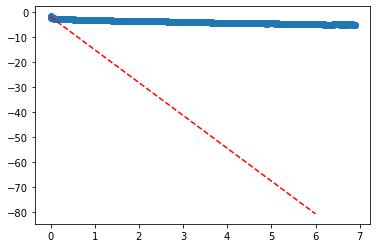

In [16]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=0 #np.mean(g2t[-200:-1])
tau, a, b=fit_exponential_decay(plateau,np.array(average_g2t),lagtime_g2t,1,5, True)

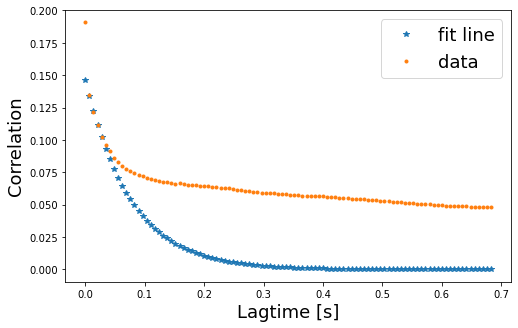

In [17]:
reconstruct(lagtime_g2t[0:100],plateau,np.array(average_g2t[0:100]),a,b)

In [18]:
angle=180
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)
D=a/(-2*q**2)
print(D)

6.822994656513418e-15


In [68]:
#expected D
kb=1.380649*10**(-23) # J*K^(-1)
T=300 # K
eta=0.5344271374009871 # Pa*S
r=50*10**(-9) # m
D=kb*T/(6*math.pi*eta*r) #m^2/s
print(D) #m^2/s

8.223276762984092e-15


# 0.05% 100 nm 10x_objective 1 au

In [21]:
video_time_length=120 #s
video_frame_numbers=24092 #frames
imgname='0p05percentwt_100nm_inglycerol_82umdepth_2min_1au_10x_obj'
foldername='/Volumes/WENYUN WANG/20220712/analysis/'
framespeed=video_time_length/video_frame_numbers
NA=0.45

In [22]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]

In [23]:
print(frame_number)

24092


In [84]:
laglist_g2t=range(0,500,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(30,90,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)
average_g2t=np.mean(averaged_g2t,axis=0)     
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [24]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

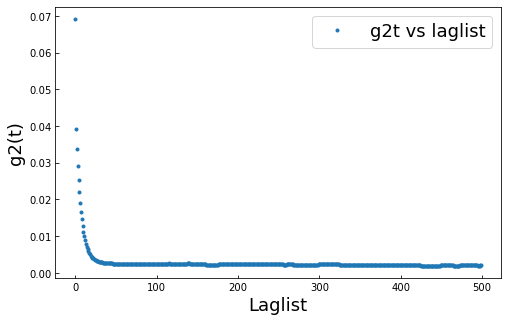

In [25]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.03193764193527458
y = -31.31102 * x + -3.13662


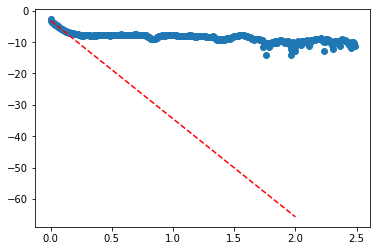

In [26]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[-100:-1])
tau, a, b=fit_exponential_decay(plateau,np.array(average_g2t),lagtime_g2t,1,5, True)

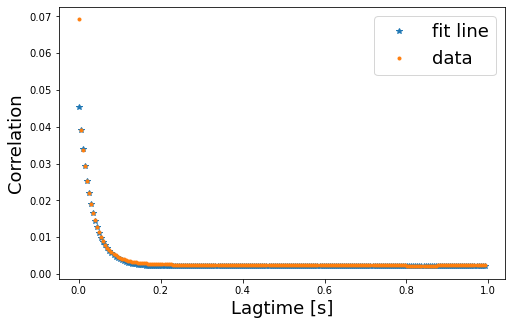

In [27]:
reconstruct(lagtime_g2t[0:200],plateau,np.array(average_g2t[0:200]),a,b)

In [28]:
angle=180
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)
D=a/(-2*q**2)
print(D)

1.626138286584296e-14


In [67]:
#expected D
kb=1.380649*10**(-23) # J*K^(-1)
T=300 # K
eta=0.5344271374009871 # Pa*S
r=50*10**(-9) # m
D=kb*T/(6*math.pi*eta*r) #m^2/s
print(D) #m^2/s

8.223276762984092e-15


# 0.05% 100 nm 10x_objective 0.47 au

In [31]:
video_time_length=30 #s
video_frame_numbers=6047 #frames
imgname='0p05percentwt_100nm_inglycerol_84umdepth_30s_0p47au_10xobj'
foldername='/Volumes/WENYUN WANG/20220712/analysis/'
framespeed=video_time_length/video_frame_numbers
NA=0.45

In [32]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]

In [33]:
print(frame_number)

6047


In [142]:
laglist_g2t=range(0,500,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(70,100,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)
average_g2t=np.mean(averaged_g2t,axis=0)     
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [34]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

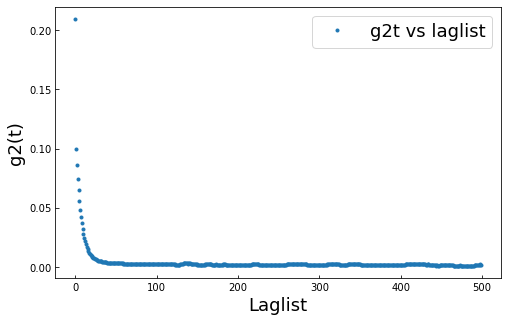

In [35]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.03386675649568932
y = -29.52748 * x + -2.18100


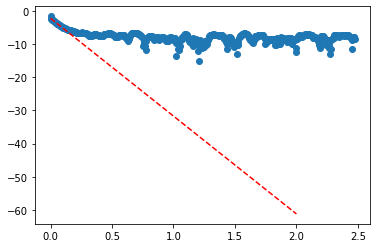

In [50]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[-100:-1])
tau, a, b=fit_exponential_decay(plateau,np.array(average_g2t),lagtime_g2t,1,10, True)

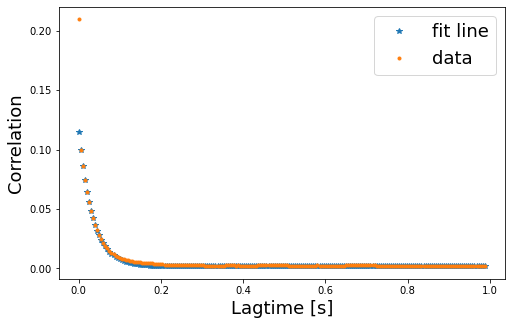

In [51]:
reconstruct(lagtime_g2t[0:200],plateau,np.array(average_g2t[0:200]),a,b)

In [65]:
angle=180
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)
D=a/(-2*q**2)
print(D)

1.5335103714694568e-14


In [66]:
#expected D
kb=1.380649*10**(-23) # J*K^(-1)
T=300 # K
eta=0.5 # Pa*S
r=50*10**(-9) # m
D=kb*T/(6*math.pi*eta*r) #m^2/s
print(D) #m^2/s

8.789484520995288e-15


# 0.27% 100 nm 10x_objective 1 au

In [12]:
video_time_length=30 #s
video_frame_numbers=6052 #frames
imgname='0p27percentwt_100nm_inglycerol_83umdepth_30s_1au_10xobj'
foldername='/Volumes/wwyyrx/Wenyun/Speckle/20220712/analysis/'
framespeed=video_time_length/video_frame_numbers
NA=0.45

In [13]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]

In [126]:
laglist_g2t=range(0,500,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(30,90,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)
average_g2t=np.mean(averaged_g2t,axis=0)     
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [127]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))

tau is: 0.009339091664248074
y = -107.07679 * x + -1.93160


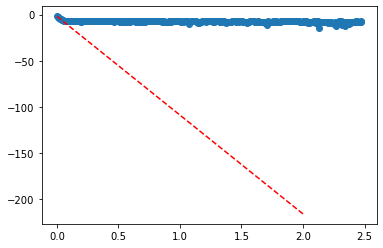

In [128]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=0 #np.mean(g2t[-200:-1])
tau, a, b=fit_exponential_decay(plateau,np.array(average_g2t),lagtime_g2t,1,5, True)

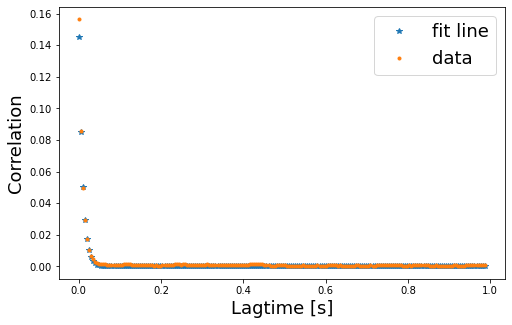

In [129]:
reconstruct(lagtime_g2t[0:200],plateau,np.array(average_g2t[0:200]),a,b)

In [130]:
angle=180
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)
D=a/(-2*q**2)
print(D)

5.561035719671529e-14


In [69]:
kb=1.380649*10**(-23) # J*K^(-1)
T=300 # K
eta=0.15487275188542243 # Pa*S
r=50*10**(-9) # m
D=kb*T/(6*math.pi*eta*r) #m^2/s
print(D) #m^2/s

2.83764716968996e-14


# 0.27% 100 nm 10x_objective 0.26 au

In [70]:
video_time_length=30 #s
video_frame_numbers=6053 #frames
imgname='0p27percentwt_100nm_inglycerol_83umdepth_30s_0p26au_10xobj'
foldername='/Volumes/WENYUN WANG/20220712/analysis/'
framespeed=video_time_length/video_frame_numbers
NA=0.45

img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]

In [71]:
print(frame_number)

6053


In [144]:
laglist_g2t=range(0,500,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(70,100,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)
average_g2t=np.mean(averaged_g2t,axis=0)     
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [72]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

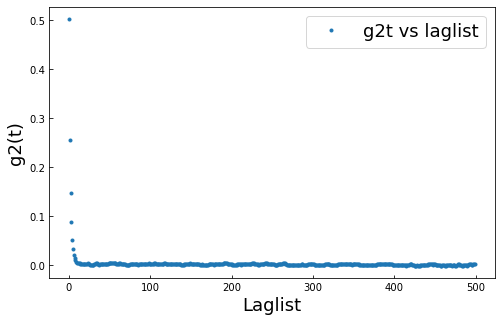

In [73]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.00932463800375418
y = -107.24277 * x + -0.84117


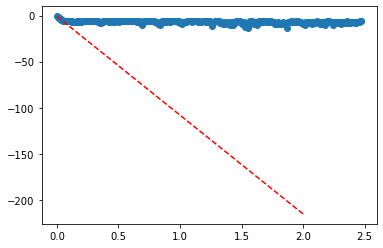

In [75]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[-100:-1])
tau, a, b=fit_exponential_decay(plateau,np.array(average_g2t),lagtime_g2t,1,5, True)

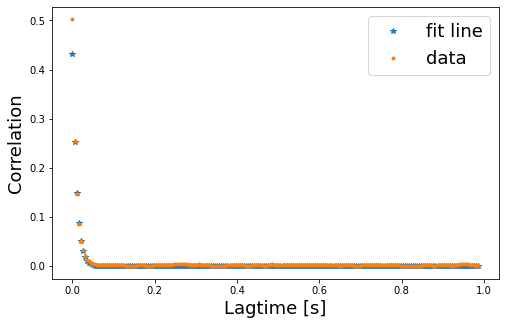

In [76]:
reconstruct(lagtime_g2t[0:200],plateau,np.array(average_g2t[0:200]),a,b)

In [77]:
angle=180
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)
D=a/(-2*q**2)
print(D)

5.5696556062831257e-14


In [80]:
kb=1.380649*10**(-23) # J*K^(-1)
T=300 # K
eta=0.15 # Pa*S
r=50*10**(-9) # m
D=kb*T/(6*math.pi*eta*r) #m^2/s
print(D) #m^2/s

2.929828173665096e-14


# 0.27% 100 nm 40x_objective 4.08 au

In [81]:
video_time_length=30 #s
video_frame_numbers=4332 #frames
imgname='0p27percentwt_100nm_inglycerol_102umdepth_30s_4p08au_40xwobj'
foldername='/Volumes/WENYUN WANG/20220712/analysis/'
framespeed=video_time_length/video_frame_numbers

In [82]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]

In [83]:
print(frame_number)

4332


In [147]:
laglist_g2t=range(0,500,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(70,100,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)
average_g2t=np.mean(averaged_g2t,axis=0)     
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [84]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

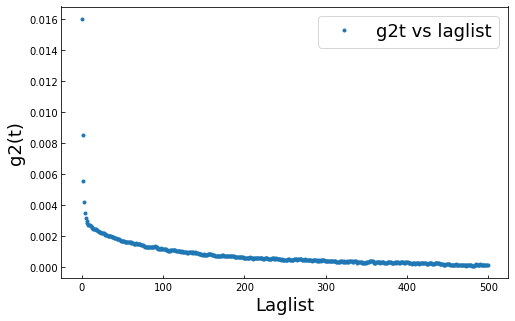

In [85]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.01593026391409139
y = -62.77360 * x + -4.35426


/Users/wenyun/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


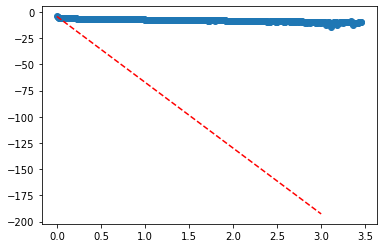

In [88]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[-100:-1])
tau, a, b=fit_exponential_decay(plateau,np.array(average_g2t),lagtime_g2t,1,3, True)

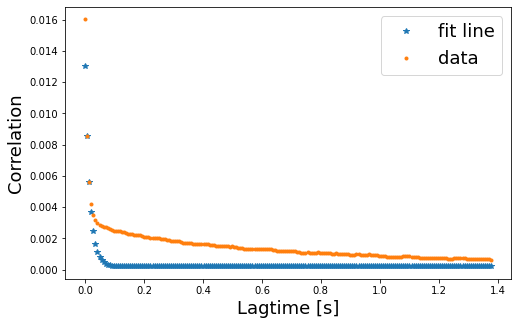

In [89]:
reconstruct(lagtime_g2t[0:200],plateau,np.array(average_g2t[0:200]),a,b)

In [90]:
angle=180
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)
D=a/(-2*q**2)
print(D)

3.260148269623465e-14


In [91]:
kb=1.380649*10**(-23) # J*K^(-1)
T=300 # K
eta=0.15 # Pa*S
r=50*10**(-9) # m
D=kb*T/(6*math.pi*eta*r) #m^2/s
print(D) #m^2/s

2.929828173665096e-14


# 0.27% 100 nm 40x water_objective 1 au

In [6]:
video_time_length=30 #s
video_frame_numbers=4391 #frames
imgname='0p27percentwt_100nm_inglycerol_102umdepth_30s_1au_40xwobj'
foldername='/Volumes/WENYUN WANG/20220712/analysis/'
framespeed=video_time_length/video_frame_numbers
NA=1.1

img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]

In [7]:
print(frame_number)

4391


In [8]:
laglist_g2t=range(0,500,1)
averaged_g2t=[]
for y in range(10,30,1):
    for x in range(70,100,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)
average_g2t=np.mean(averaged_g2t,axis=0)     
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

KeyboardInterrupt: 

In [9]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

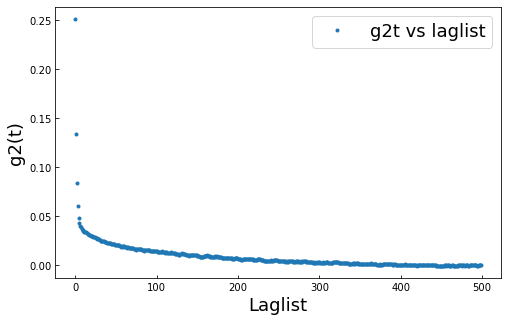

In [10]:
plt.figure(figsize=(8,5))
plt.plot(laglist_g2t,average_g2t,'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.8017007673756815
y = -1.24735 * x + -3.44417


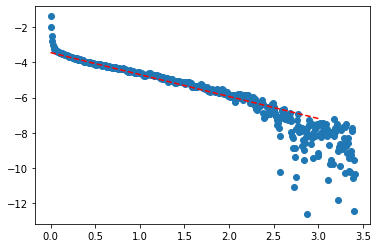

In [12]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[-100:-1])
tau, a, b=fit_exponential_decay(plateau,np.array(average_g2t),lagtime_g2t,30,100, True)

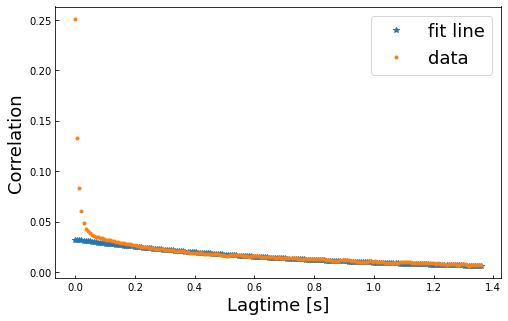

In [13]:
reconstruct(lagtime_g2t[0:200],plateau,np.array(average_g2t[0:200]),a,b)

In [97]:
angle=180
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*math.sin(math.radians(angle/2))*10**(9)
D=a/(-2*q**2)
print(D)

3.3045501043205487e-14
